In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.techindicators import TechIndicators
import numpy as np


In [2]:
"""----------------------------------IMPORTATION DES VALEURS BOURSIERES --------------------------------"""
key = '8NY5A51OROX11O2Y'
ts = TimeSeries(key=key,output_format='pandas', indexing_type='date')


Nasdaq = 'NDAQ'
sp_500 = 'SPY'
CAC_40 = 'PX1'

#IMPORTATION NASDAQ
ts = TimeSeries(key = key, output_format = 'csv')
totalData = ts.get_intraday_extended(symbol ='SPY', interval = '15min', slice = 'year1month1')
df = pd.DataFrame(list(totalData[0]))

#setup of column and index
header_row=0
df.columns = df.iloc[header_row]
df = df.drop(header_row)
df = df.set_index('time')
df = df.reindex(index=df.index[::-1])

df

,open,high,low,close,volume
time,,,,,
2022-12-12 04:15:00,391.3410864108012,391.42071629917456,391.1320579538212,391.42071629917456,21094
2022-12-12 04:30:00,391.3311326747545,391.5202536596412,391.2813639945212,391.36099388289455,11375
2022-12-12 04:45:00,391.3410864108012,391.83877321313463,391.3410864108012,391.8288194770879,5094
2022-12-12 05:00:00,391.85868068522797,392.2369226550013,391.85868068522797,392.2369226550013,10909
2022-12-12 05:15:00,392.2070614468613,392.426043639888,392.18715397476797,392.426043639888,9497
...,...,...,...,...,...
2023-01-09 19:00:00,387.61,387.69,387.38,387.54,18247
2023-01-09 19:15:00,387.6,387.66,387.44,387.47,6101
2023-01-09 19:30:00,387.42,387.42,386.8,386.95,44849


In [3]:
for column in df:
    df[column] = df[column].astype(float)
df_returns = df.pct_change()
print(df_returns)

0                        open      high       low     close    volume
time                                                                 
2022-12-12 04:15:00       NaN       NaN       NaN       NaN       NaN
2022-12-12 04:30:00 -0.000025  0.000254  0.000382 -0.000153 -0.460747
2022-12-12 04:45:00  0.000025  0.000814  0.000153  0.001195 -0.552176
2022-12-12 05:00:00  0.001323  0.001016  0.001323  0.001042  1.141539
2022-12-12 05:15:00  0.000889  0.000482  0.000838  0.000482 -0.129434
...                       ...       ...       ...       ...       ...
2023-01-09 19:00:00 -0.000335 -0.000284 -0.000825 -0.000413  2.884820
2023-01-09 19:15:00 -0.000026 -0.000077  0.000155 -0.000181 -0.665644
2023-01-09 19:30:00 -0.000464 -0.000619 -0.001652 -0.001342  6.351090
2023-01-09 19:45:00 -0.001291 -0.000645  0.000284  0.000388 -0.607951
2023-01-09 20:00:00  0.000465  0.000103  0.000439  0.000129  2.511687

[1217 rows x 5 columns]


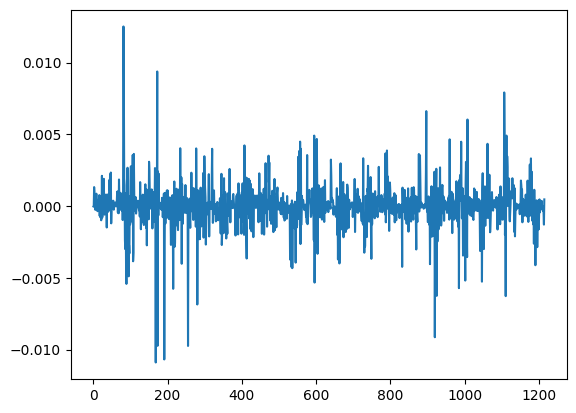

In [4]:
returns = df_returns['open'].to_numpy()[1:]
plt.plot(returns)

(200,)


/home/thomas/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


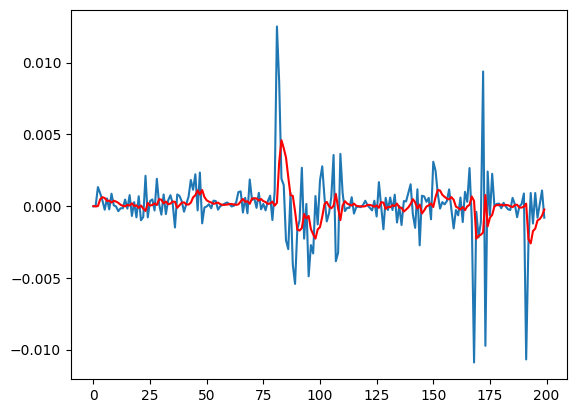

In [5]:
from statsmodels.tsa.arima.model import ARIMA

print(returns[:200].shape)
model = ARIMA(returns[:200],order=(2,1,2))
results = model.fit()

plt.plot(returns[:200])
plt.plot(results.fittedvalues, color='red')

In [6]:
class  ARIMA_WINDOW():
    def __init__(self, k, d, p, window_size):

        self.k = k
        self.d = d
        self.p = p
        self.history = []
        self.window_size = window_size
        self.model_trained = False
        self.fitted_model = None

    def learn_one(self, x):

        self.history.append(x)
        if len(self.history) == self.window_size:
            self.model_trained = True
            model = ARIMA(np.array(self.history),
                                        order=(self.k,self.d,self.d))
            self.fitted_model = model.fit()
            
        elif len(self.history) > self.window_size:
            self.history.pop(0)
            model = ARIMA(np.array(self.history),
                                        order=(self.k,self.d,self.d))
            self.fitted_model = model.fit()
            
    def predict_one(self):
        if self.model_trained:
            return self.fitted_model.forecast()[0]
        else:
            raise Exception

In [7]:
window_size = 100
arima_test = ARIMA_WINDOW(2,1,2,window_size=window_size)

/home/thomas/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/thomas/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


0.0
0.0017749029291697603
0.0027699421373513114
0.002275475100115969
-0.0012327383933796359
-0.00012071189424687915
0.000376274255467801
0.0035598637334561716
-0.0012854129725634643
-0.00119971593257825
0.0019245975874088504
0.0002682724601805698
-5.886419126615618e-05
7.251619251250706e-05
-2.877412929331658e-06
0.0003984943083794978
-0.00022483274125395698
1.4973136332796107e-05
-3.2039189002939204e-05
-6.467022465730863e-05
2.698598831643125e-05
0.00021359319078049967
4.020566981457185e-05
-3.3903371049279617e-05
-0.00015333557273884362
0.00022917883651857074
-0.0004565559932918737
0.0010123959079293419
-1.5996735174770562e-06
-0.0008756396626450476
0.0004015347707972232
-0.000255064219847497
0.00033985063038362035
-0.00018093937970546967
0.0005025944659908324
-0.0006630833687395004
1.8092450855651033e-05
-0.0008319893533685024
0.00011758025894884592
9.187522867803698e-05
0.00034760107221672317
0.0009224491064148475
-0.0002446187275544436
-0.0007817607553512796
0.0007476043050267925

[]

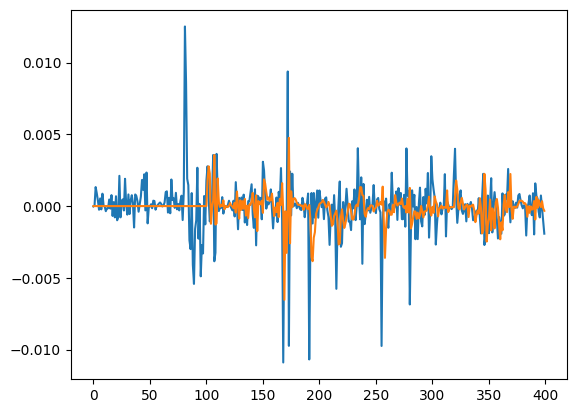

In [8]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

return_predicted = np.zeros_like(returns[:400])
for i,r in enumerate(returns[:400]):
    arima_test.learn_one(r)
    if return_predicted.shape[0] - 1 > i >= window_size:
        print(return_predicted[i])
        return_predicted[i+1] = arima_test.predict_one()

plt.plot(returns[:400])
plt.plot(return_predicted)
plt.plot()

